In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

### 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.


Text(0.5, 1.0, 'Poisson distribution $λ = 2$')

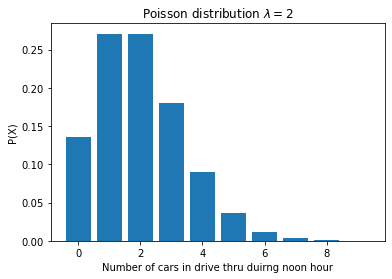

In [63]:
λ = 2
x = np.arange(0,10)
y = stats.poisson(λ).pmf(x)

plt.bar(x,y)
plt.xlabel('Number of cars in drive thru duirng noon hour')
plt.ylabel('P(X)')
plt.title('Poisson distribution $λ = 2$')

In [78]:
# What is the probability that no cars drive up in the noon hour?
λ = 2
stats.poisson(λ).pmf(0)

0.1353352832366127

In [66]:
# What is the probability that 3 or more cars come through the drive through?
stats.poisson(λ).sf(2)

0.32332358381693654

In [68]:
# How likely is it that the drive through gets at least 1 car?
stats.poisson(λ).sf(0)

0.8646647167633873

### 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:


In [10]:
#  normal distribution
μ = 3
σ =.3
grades = stats.norm(μ,σ)

In [12]:
# What grade point average is required to be in the top 5% of the graduating class?

grades.isf(0.05)

3.4934560880854417

In [80]:
# check using simulation

(np.random.normal(3, 0.3, 10_000) > 3.4934560880854417).mean()


0.0507

In [15]:
# What GPA constitutes the bottom 15% of the class?

grades.ppf(0.15)

2.689069983151863

In [81]:
# check using simulation

(np.random.normal(3, 0.3, 10_000) < 2.689069983151863).mean()

0.1495

In [83]:
# using simulation
# the value at q = 0.15 will be the gpa
np.quantile(np.random.normal(3, 0.3, 10_000), 0.15)


2.6867989306139717

In [77]:
# An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 
# Determine the range of the third decile. 
# Would a student with a 2.8 grade point average qualify for this scholarship?

# third decile = 0.2 to 0.3 - range is between 20% and 30%

# use ppf since we want the bottom of class. 
# if we wanted top of close use isf
lower_bound = grades.ppf(0.2) # gives gpa for bottom 20%
upper_bound = grades.ppf(0.3) # gives gpa for bottom 30%

print(f'range is between gpa {lower_bound} and {upper_bound}')
# student with 2.8 gpa will qualify for the scholarship

range is between gpa 2.7475136299281258 and 2.842679846187588


In [86]:
# using simulation
# lower range
np.quantile(np.random.normal(3,0.3,10_000), 0.2)

2.749590932680559

In [87]:
# using simulation
# upper range
np.quantile(np.random.normal(3,0.3,10_000), 0.3)

2.8436460588690062

In [18]:
# If I have a GPA of 3.5, what percentile am I in?
# percentile is how many are lower 
grades.cdf(3.5)

0.9522096477271853

In [88]:
# check using sim
(np.random.normal(3,0.3,10_000) < 3.5).mean()

0.9528

### 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs.  How likely is it that this many people or more click through?

In [19]:
# binomial dist

n_trials = 4326
p = 0.02 #prob of success

website_clicks = stats.binom(n_trials,p)

In [20]:
website_clicks.sf(96)

0.1397582363130086

In [113]:
# check using sim
n_rows = 10_000
n_cols =4326
outcomes = [0,1]
p_s = 0.02
p_f = 0.98
data = np.random.choice(outcomes, (n_rows * n_cols),p = [p_f,p_s]).reshape(n_rows, n_cols)
(data.sum(axis = 1) > 96).mean()

0.1398

### 4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

### What is the probability that at least one of your first 60 answers is correct?



In [24]:
# binomial dist

n_trials = 60
p = 0.01

number_correct = stats.binom(n_trials, p)

In [25]:
number_correct.sf(0)

0.4528433576092388

In [114]:
# check using sim
n_rows = 10_000
n_cols = 60
outcomes = [0,1]
p_s = 0.01
p_f = 0.99
data = np.random.choice(outcomes, (n_rows * n_cols),p = [p_f,p_s]).reshape(n_rows, n_cols)
(data.sum(axis = 1) > 0).mean()

0.4519

### 5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. 

In [29]:
# binomial dist

n_trials = round(0.9 * 3 * 22)
p = 0.03 #prob of success

cleanings = stats.binom(n_trials,p)

In [30]:
# How likely is it that the break area gets cleaned up each day? 
cleanings.sf(0)

0.8342199288437355

In [109]:
# using sim
n_rows = 10_000
n_cols = round(0.9 * 3 * 22)
outcomes = [0,1]
p_f = 0.97
p_s = 0.03 
data = np.random.choice(outcomes, (n_rows * n_cols),p = [p_f,p_s]).reshape(n_rows, n_cols)
(data.sum(axis = 1) > 0).mean()

0.8345

In [32]:
#How likely is it that it goes two days without getting cleaned up?
n = n_trials * 2
p = 0.03

stats.binom(n,p).pmf(0)

0.02748303199257623

In [116]:
# using sim
n_rows = 10_000
n_cols = round(2*(0.9 * 3 * 22))
outcomes = [0,1]
p_f = 0.97
p_s = 0.03 
data = np.random.choice(outcomes, (n_rows * n_cols),p = [p_f,p_s]).reshape(n_rows, n_cols)
(data.sum(axis = 1) == 0).mean()

0.0254

In [35]:
# #How likely is it that it goes all week without getting cleaned up?

n = n_trials * 5
p = 0.03

stats.binom(n, p).pmf(0)

0.00012521651388091353

In [117]:
# using sim
n_rows = 10_000
n_cols = round(5*(0.9 * 3 * 22))
outcomes = [0,1]
p_f = 0.97
p_s = 0.03 
data = np.random.choice(outcomes, (n_rows * n_cols),p = [p_f,p_s]).reshape(n_rows, n_cols)
(data.sum(axis = 1) == 0).mean()

0.0001

### 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [41]:
#normal dist

# convet mean and std dev to mins
# mean = 15 * 2 = 30
# std_dev = 3 * 2 = 6

# max time to eat without being late: 60 - 15 - 10 = 35mins
stats.norm(30,6).cdf(35)

0.7976716190363569

In [89]:
# check using sim
(np.random.normal(30,6,10_000) < 35).mean()

0.7997

### 7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

In [42]:
from env import host, user, password

In [43]:
url = f'mysql+pymysql://{user}:{password}@{host}/employees'


In [47]:
query = '''
select * 
from employees
join salaries s using (emp_no)
where to_date > now()
'''

employees = pd.read_sql(query, url)

In [49]:
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01


In [51]:
# find the average salary of current employees, along with the standard deviation.

avg_salary = employees.salary.mean()
avg_salary

72012.23585730705

In [53]:
std_dev_salary = employees.salary.std()
std_dev_salary

17309.99538025198

In [54]:
#normal dist
salary_dist = stats.norm(avg_salary,std_dev_salary)

In [62]:
# a. What percent of employees earn less than 60,000?
salary_dist.cdf(59_999)

0.2438393099761686

In [57]:
# b. What percent of employees earn more than 95,000?
salary_dist.sf(95_000)

0.09208819199804053

In [58]:
# c. What percent of employees earn between 65,000 and 80,000?
salary_dist.cdf(80_000) - salary_dist.cdf(65_000)

0.3350605685446666

In [59]:
# d. What do the top 5% of employees make?
salary_dist.isf(0.05)

100484.64454102777